#### Loading dataset

In [ ]:
import numpy as np
import warnings

data = np.genfromtxt('data/income.csv',
                     delimiter=',',
                     skip_header=1)

#### Understanding the data

In [ ]:
data.shape

(88, 6)

In [ ]:
data[42, :-1]

array([7.2 , 7.75, 5.7 , 7.  , 5.2 ])

In [ ]:
data[42, :][-1]

6.810344827586207

### Multiple Linear Regression Definition

$y_{i} = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{p}X_{p}$

where:

Slope = $\beta_{1}$, $\beta_{2}$, ... $\beta_{p}$

Y-intercept = $\beta_{0}$

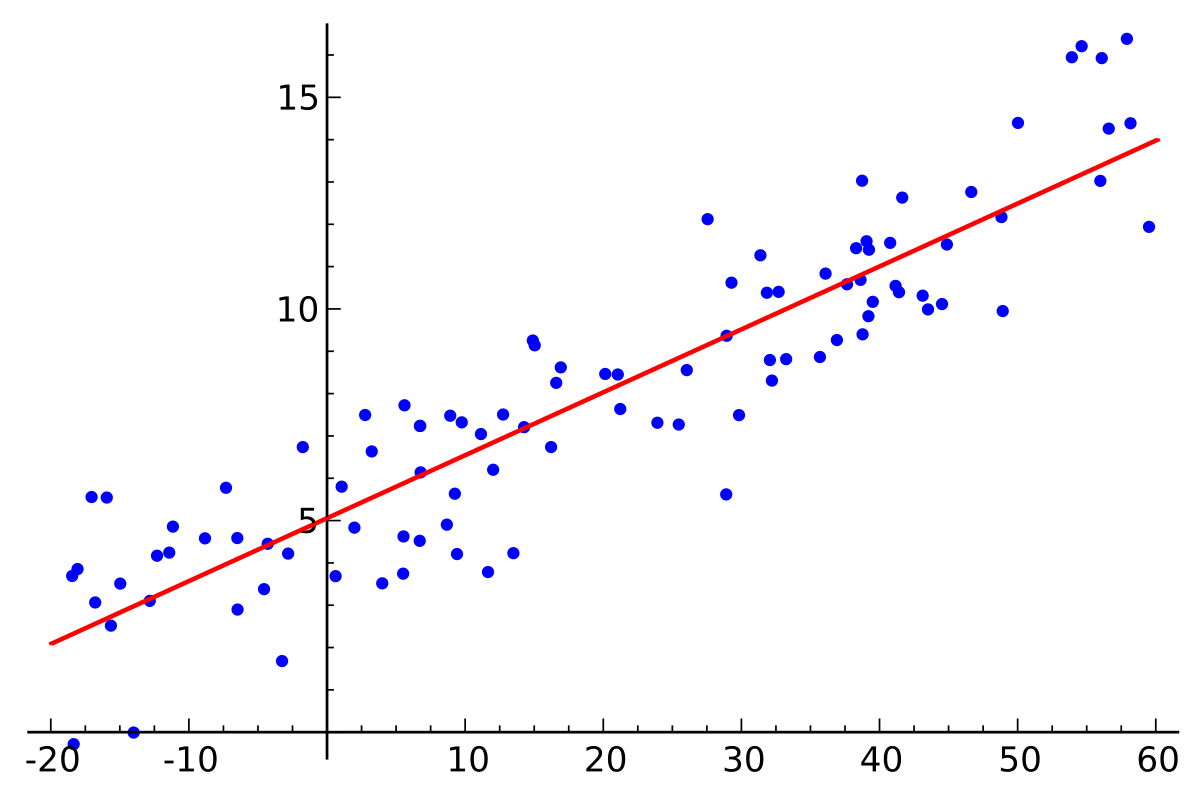

### Spliting the data

In [ ]:
x = data[:, :-1]
x.shape

(88, 5)

#### Defining the prediction column

In [ ]:
y = data[:, -1]
y.shape

(88,)

## Computing Multiple Linear Regression

### Visualizing the model


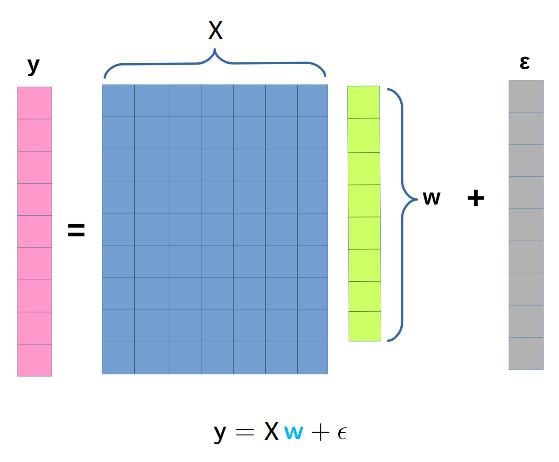

$\nabla g(w^{(t+1)}) = w^t + (\alpha \nabla g(w^t))$

$\nabla g(w^t) = \sum\left(x^T \times(y - \hat{y})\right)$

$\hat{y} = x \times w^t$

$RSS = \sqrt{(\nabla g(w^{t})^{2})}$

In [ ]:
def fit_linear_regression(x, y,
                         learning_rate=0.00001,
                         epsilon=0.9):
    """
    Fit a linear regression using gradient descent

    Parameters
    ----------
    x: np.array
      Numpy Array with the Xs values
    y: np.array
      Numpy Array with the Ys values
    learning_rate: float
      The learning rate factor number
    epsilon: float
      The error threshold, when the error is lesser then the epsilon the model
      converged

    Returns
    ----------
    np.array
      Array with the regression weights
    """
    # Step 1: Insert a new column with ones for y-intercept
    regression = np.c_[x, np.ones(len(x))]

    # Step 2: Declare the weigths with the same width than x
    weights = np.ones(regression.shape[1])

    # Step 3: Implement gradient descent
    norma = 1
    while(norma > epsilon):
        # Step 3.1: compute the partial
        y_pred = regression @ weights.T
        partial = regression.T @ (y - y_pred)
        # Step 3.2: compute the norma
        norma = np.sum(np.sqrt(np.square(partial)))

        # Step 3.3: ajust the weights
        weights = weights.T + (learning_rate * partial)
        if (np.isnan(norma)):
          warnings.warn('The model diverged, try to use a smaller learning rate')

    return weights

In [ ]:
def predict(w, x):
    """
    Predict a value using a multiple linear regression

    Parameters
    ----------
    w: np.array
      Array with the regression weights
    x: np.array
      The Xs values

    Returns
    ----------
    np.array
      Array with the predicted values
    """
    return w[:-1] @ np.array(x).T + w[-1]

In [ ]:
def MSE(y, y_pred):
  """
  Get the mean squared error

  Parameters
  ----------
  y: np.array
    The Ys values
  y_pred: np.array
    The predicted Ys values

  Returns
  ----------
  float
    THe mean squared error
  """
  return np.sum(np.square(y - y_pred))/float(len(y))

In [ ]:
w = fit_linear_regression(x, y)

In [ ]:
w

array([0.1178864 , 0.08483442, 0.1633737 , 0.41756877, 0.03027681,
       0.94436615])

# Comparing with sklearn

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/income.csv')
df.head(10)

,calculo1,lpt,p1,ic,calculo2,cra
0,8.7,10.0,9.0,9.1,8.4,8.477647
1,7.0,7.0,7.7,7.0,6.2,6.851724
2,8.6,9.8,7.9,9.6,8.7,9.090588
3,7.8,8.3,6.8,8.2,8.0,7.283516
4,5.2,9.3,5.0,8.5,5.0,7.205747
5,6.1,9.2,9.1,9.3,5.6,7.808235
6,6.3,9.6,8.3,8.6,6.7,8.858824
7,7.5,8.9,7.5,7.9,5.0,6.158824
8,6.6,9.0,5.0,7.9,5.0,6.730588
9,7.5,6.5,7.3,9.2,8.2,7.079310


In [ ]:
from sklearn import linear_model


X = df[['calculo1', 'lpt', 'p1', 'ic', 'calculo2']]
y = df['cra']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)
print(regr.intercept_)

[0.10304143 0.0464367  0.16409834 0.38117843 0.02027816]
1.7377115137944363


MSE of sklearn

In [ ]:
MSE(y, regr.predict(X))

0.41133758922770947

MSE of our model

In [ ]:
MSE(y, predict(w, X))

0.4157530854887687